In [4]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import sys
sys.path.append(r'C:\Users\fuqih\Documents\GitHub\DatabaseCodes_QF\Computer Codes\Targets')
import numpy as np
import matplotlib.pyplot as plt
from Utilities import OutputExcel, clear_sheet
import pandas as pd

In [3]:
sheetname = "Diffusivity"
clear_sheet(sheetname)

finished


### "A.-A. Tavassoli, J.-W. Rensman, M. Schirra, K. Shiba, Materials design data for reduced activation martensitic steel type f82h, Fusion Engineering and Design 61 (2002) 617–628."

In [6]:
# Define the temperature range and function for thermal diffusivity
T = np.arange(300, 6001, 20)
F82H_alpha = lambda T: 1e-6 * (0.089188 + 1.4051e-5 * T - 5.7859e-8 * T**2)

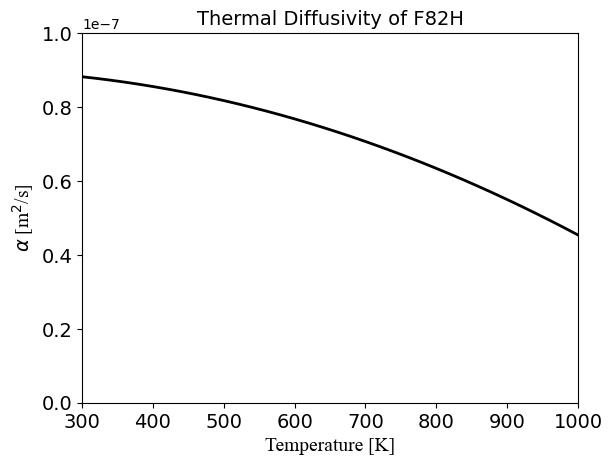

In [7]:
# Calculate thermal diffusivity for each temperature value
k = np.array([F82H_alpha(temp) for temp in T])

# Plot the data
fig = plt.figure('W Thermal Diffusivity')
plt.plot(T, k, 'k', linewidth=2)
plt.xlabel('Temperature [K]', fontsize=14, fontname='Times New Roman')
plt.ylabel(r'$\alpha$ [m$^2$/s]', fontsize=14, fontname='Times New Roman')
plt.xlim([300, 1000])
plt.ylim([0, 1e-7])
plt.title('Thermal Diffusivity of F82H', fontsize=14)
ax = plt.gca()
ax.set_xticks(np.arange(300, 1100, 100))
ax.set_yticks(np.linspace(0, 1e-7, 6))
ax.tick_params(labelsize=14)
plt.show()

In [8]:
inital_row = 1
title = "Thermal Diffusivity of F82H"
reference = ["A.-A. Tavassoli, J.-W. Rensman, M. Schirra, K. Shiba, Materials design data for reduced activation martensitic steel type f82h, Fusion Engineering and Design 61 (2002) 617–628."]

OutputExcel(sheetname, title, reference, inital_row, [], [fig])

finished


### "Eurofer MPH 2016"

In [9]:
temperature = [20, 50, 100, 200, 300, 400, 500, 600]
thermal_diffusivity = [8.12, 8.04, 7.89, 7.52, 7.05, 6.48, 5.80, 5.02]

df_diffusivity = pd.DataFrame({
    "Temperature (°C)": temperature,
    "Thermal Diffusivity (10^-6 m^2/s)": thermal_diffusivity
})

In [10]:
def fit_func(t):
    t_k = t + 273.15
    alpha = 0.08381 + 6.00691e-6 * t_k - 5.09213e-8 * t_k**2
    alpha = alpha * 100
    return alpha

In [11]:
T = range(0, 601, 20)
alpha = np.array([fit_func(temp) for temp in T])

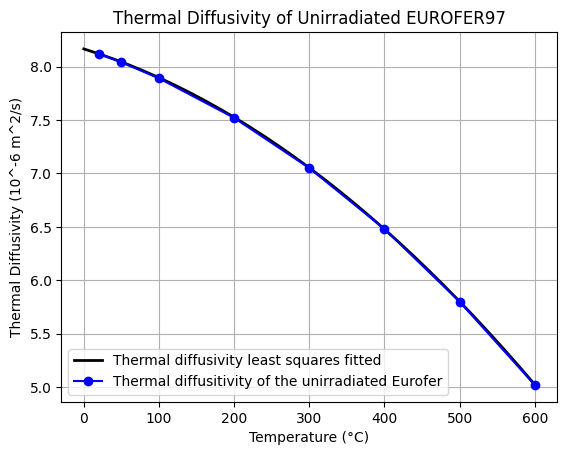

In [12]:
fig2 = plt.figure()
plt.plot(T, alpha, 'k', linewidth=2, label="Thermal diffusivity least squares fitted")
plt.plot(df_diffusivity["Temperature (°C)"], df_diffusivity["Thermal Diffusivity (10^-6 m^2/s)"], marker='o', linestyle='-', color='b', label = "Thermal diffusitivity of the unirradiated Eurofer")
plt.title('Thermal Diffusivity of Unirradiated EUROFER97')
plt.xlabel('Temperature (°C)')
plt.ylabel('Thermal Diffusivity (10^-6 m^2/s)')
plt.grid(True)
plt.legend()
plt.show()

In [13]:
inital_row = 30
title = "Thermal Diffusivity of Eurofer"
reference = [
    "ASTM-E-1461 Standard Test Method for Thermal Diffusivity by the Flash Method",
    "ASTM E-1142 Standard Terminology Relating to Thermophysical Properties",
    "F. Tavassoli: 'Comparison of 316L(N) -IG and Eurofer for Early DEMO'. EFDA-WP13-MAT-02-01",
    "K. Mergia, N. Boukos: 'Structural, thermal, electrical and magnetic properties of Eurofer97 steel', J. Nucl. Mater. 373 (2008) 1-8"
]

OutputExcel(sheetname, title, reference, inital_row, [df_diffusivity], [fig2])

finished


### "F. Tavassoli, DEMO Interim structural design criteria. Ref. N, T.-DMN/DIR 2002."

In [14]:
data_diffusivity = {
    'EUROFER97 Temp (K)': [295.5958549, 322.7979275, 373.3160622, 472.7979275, 573.0569948, 673.3160622, 772.7979275, 873.0569948],
    'EUROFER97 Thermal Diffusivity (cm²/s)': [0.081640712, 0.080789766, 0.077536151, 0.075784205, 0.070728587, 0.064822024, 0.058014461, 0.05025584],
    'F82H Temp (K)': [293.2644287, 373.3160622, 472.7979275, 573.0569948, 672.5388601, 772.7979275, 873.0569948, 973.3160622, 1072.797927],
    'F82H Thermal Diffusivity (cm²/s)': [0.088598443, 0.086464274, 0.082341491, 0.078637375, 0.072630071, 0.065773081, 0.057664071, 0.048053393, 0.04752836]
}

In [17]:
df = pd.DataFrame.from_dict(data_diffusivity, orient='index').transpose()

In [15]:
degree = 2
coeffs_eurofer97_diff = np.polyfit(data_diffusivity['EUROFER97 Temp (K)'], data_diffusivity['EUROFER97 Thermal Diffusivity (cm²/s)'], degree)
poly_eurofer97_diff = np.poly1d(coeffs_eurofer97_diff)
coeffs_f82h_diff = np.polyfit(data_diffusivity['F82H Temp (K)'], data_diffusivity['F82H Thermal Diffusivity (cm²/s)'], degree)
poly_f82h_diff = np.poly1d(coeffs_f82h_diff)


temp_eurofer97_diff = np.linspace(min(data_diffusivity['EUROFER97 Temp (K)']), max(data_diffusivity['EUROFER97 Temp (K)']), 500)
temp_f82h_diff = np.linspace(min(data_diffusivity['F82H Temp (K)']), max(data_diffusivity['F82H Temp (K)']), 500)

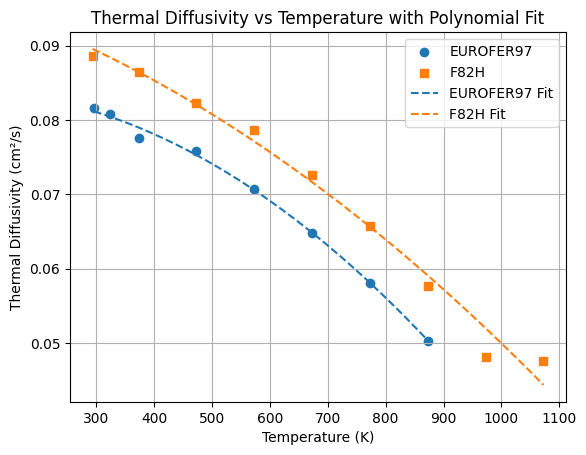

In [16]:
fig3 = plt.figure()

plt.scatter(data_diffusivity['EUROFER97 Temp (K)'], data_diffusivity['EUROFER97 Thermal Diffusivity (cm²/s)'], label='EUROFER97', marker='o')
plt.scatter(data_diffusivity['F82H Temp (K)'], data_diffusivity['F82H Thermal Diffusivity (cm²/s)'], label='F82H', marker='s')
plt.plot(temp_eurofer97_diff, poly_eurofer97_diff(temp_eurofer97_diff), label='EUROFER97 Fit', linestyle='--')
plt.plot(temp_f82h_diff, poly_f82h_diff(temp_f82h_diff), label='F82H Fit', linestyle='--')

plt.xlabel('Temperature (K)')
plt.ylabel('Thermal Diffusivity (cm²/s)')
plt.title('Thermal Diffusivity vs Temperature with Polynomial Fit')
plt.legend()
plt.grid(True)
plt.show()

In [18]:
inital_row = 72
title = "Thermal Diffusivity of Eurofer and F82H"
reference = [
    "F. Tavassoli, DEMO Interim structural design criteria. Ref. N, T.-DMN/DIR 2002.",
    "Thermal diffusivity of Eurofer 97 (solid circles) as a function of temperature. The data for F82H (open triangles) are according to Ref. [1]. The continuous and dotted lines are the least squares fitted equations (4) and (5)."
]

OutputExcel(sheetname, title, reference, inital_row, [df], [fig3])

finished
